Car Price Predictor 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
dataFrame = pd.read_excel("merc.xlsx")

In [4]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
dataFrame.isnull().sum() #boş değer olan yer var mı kontrol ediyoruz

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\2906993258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"])


<AxesSubplot: xlabel='price', ylabel='Density'>

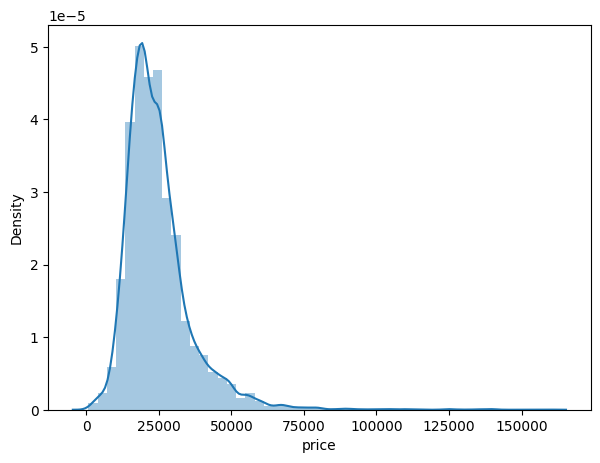

In [7]:
plt.figure(figsize=(7,5))#Grafiğin boyutunu büyüttük
sbn.distplot(dataFrame["price"])

<AxesSubplot: ylabel='count'>

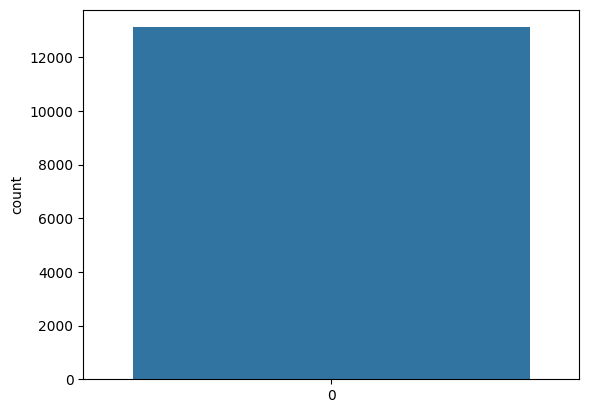

In [8]:


sbn.countplot(dataFrame["year"])


In [10]:
dataFrame.corr() #to see the correlation-relationship between features



C:\Users\harig\AppData\Local\Temp\ipykernel_6296\3949281981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr() #to see the correlation-relationship between features


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [12]:
dataFrame.corr()["price"].sort_values() #we just took the relations with the others for price and showed them in order

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\1042655074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values() #we just took the relations with the others for price and showed them in order


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='mileage', ylabel='price'>

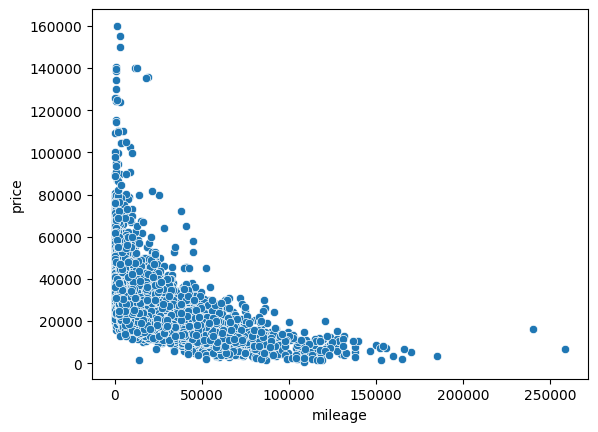

In [13]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame) #We plotted the price of the vehicle according to the kilometer. every feature can be tested



In [14]:
dataFrame.sort_values("price",ascending=False).head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


#we may want to subtract the most expensive cars from the first graph by inference
#This can enable us to get a more regular result. just a matter of preference



In [16]:
len(dataFrame)

13119

In [17]:
len(dataFrame)*0.01 #If we take 99% of a data and process it, it will not affect us. Let's throw out the 0.01 most expensive car

131.19

In [18]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price",ascending=False).iloc[131:] #iloc[131:] 131 bring the ones after the pearl. iloc is used to get by index

In [19]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\harig\AppData\Local\Temp\ipykernel_6296\2095929965.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yuzdeDoksanDokuzDf["price"])


<AxesSubplot: xlabel='price', ylabel='Density'>

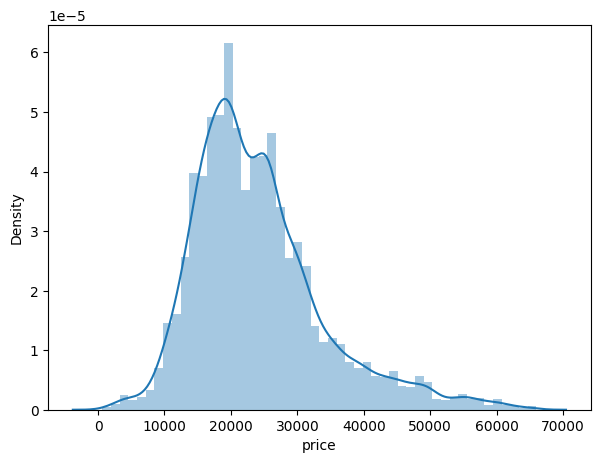

In [20]:


plt.figure(figsize=(7,5))
sbn.distplot(yuzdeDoksanDokuzDf["price"])



In [21]:
dataFrame.groupby("year").mean()["price"]

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\2092793654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [22]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\3963167876.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yuzdeDoksanDokuzDf.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
dataFrame =yuzdeDoksanDokuzDf
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"] #Looking at the average price over the years, the price in 1970 is

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\3480456695.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"] #Looking at the average price over the years, the price in 1970 is


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [24]:
dataFrame = dataFrame[dataFrame.year != 1970] #We take other data other than 1970 and put it in our dataFrame.

In [25]:
dataFrame.groupby("year").mean()["price"]

C:\Users\harig\AppData\Local\Temp\ipykernel_6296\2092793654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [26]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [27]:
dataFrame = dataFrame.drop("transmission",axis=1) #Since transmission does not have a numerical value, we do not want to put it into training and we remove it

In [28]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [31]:
len(x_train)

9090

In [32]:
len(x_test)

3897

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
x_train = scaler.fit_transform(x_train) #we did both fit and transform at the same time
x_test = scaler.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# We created a model, put layers in it, gave the number of neurons in those layers, and determined the activation function and optimizer.
#You can check the A neural network playground site for their visuals


model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [38]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test), batch_size=250, epochs=300) #We used validation_data() to calculate the train and test loss comparison directly. gave us loss and val_loss

Epoch 1/300
37/37 [==============================] - 4s 28ms/step - loss: 672140992.0000 - val_loss: 688094976.0000
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 672101696.0000 - val_loss: 688022144.0000
Epoch 3/300
37/37 [==============================] - 0s 8ms/step - loss: 671976576.0000 - val_loss: 687810944.0000
Epoch 4/300
37/37 [==============================] - 0s 8ms/step - loss: 671616960.0000 - val_loss: 687218944.0000
Epoch 5/300
37/37 [==============================] - 0s 8ms/step - loss: 670680192.0000 - val_loss: 685766656.0000
Epoch 6/300
37/37 [==============================] - 0s 8ms/step - loss: 668510272.0000 - val_loss: 682551680.0000
Epoch 7/300
37/37 [==============================] - 0s 8ms/step - loss: 663951104.0000 - val_loss: 676058880.0000
Epoch 8/300
37/37 [==============================] - 0s 8ms/step - loss: 655196672.0000 - val_loss: 664211584.0000
Epoch 9/300
37/37 [==============================] - 0s 9ms/step - loss: 639925

In [39]:
kayipVerisi = pd.DataFrame(model.history.history)

In [40]:
kayipVerisi.head()

,loss,val_loss
0,672140992.0,688094976.0
1,672101696.0,688022144.0
2,671976576.0,687810944.0
3,671616960.0,687218944.0
4,670680192.0,685766656.0


<AxesSubplot: >

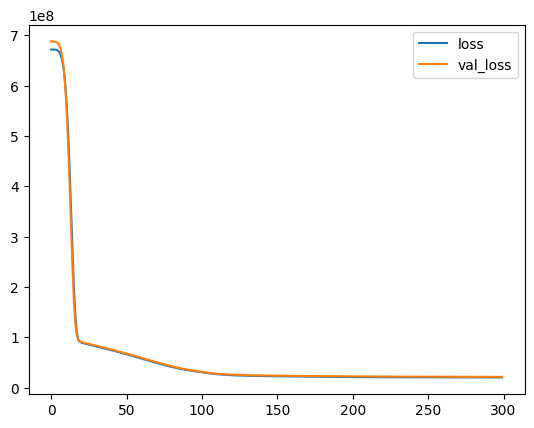

In [41]:
kayipVerisi.plot()

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
tahminDisizi = model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [44]:
tahminDisizi

array([[22079.838],
       [23955.824],
       [25147.705],
       ...,
       [26748.658],
       [10743.955],
       [24992.207]], dtype=float32)

In [45]:
mean_absolute_error(y_test,tahminDisizi)

3285.588013165175

In [46]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


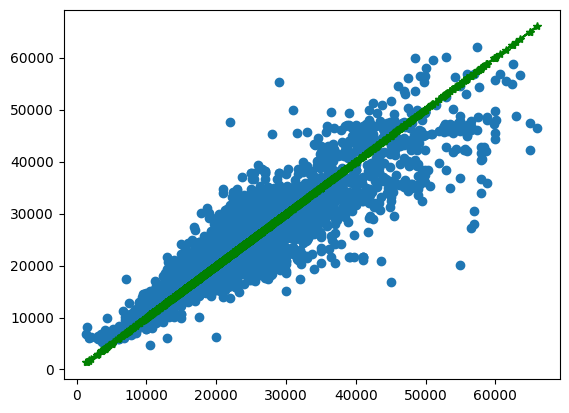

In [47]:
plt.scatter(y_test,tahminDisizi)
plt.plot(y_test,y_test,"g-*") #to get the straight line

In [48]:
#let's put another data and try
dataFrame.iloc[2]#3.brings the element

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [49]:
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [50]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [51]:
type(yeniArabaSeries) #we need to convert it to numpy series

pandas.core.series.Series

In [52]:


yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))



In [53]:


model.predict(yeniArabaSeries)



1/1 [==============================] - 0s 49ms/step


array([[57876.5]], dtype=float32)